### Load model mechanisms

In [1]:
modelPath = 'Models/Chen2002'
modelName = 'Chen2002'

def getSomaScript(h):
    
    h.load_file('mosinit.hoc')

    # Clear existing stim
    for i in h.GluSyn: 
        i.gmaxampa = 0
        i.gmaxnmda = 0

    for i in h.InhiSyn:
        i.gmaxampa = 0
        i.gmaxnmda = 0

    soma = h.soma
    
    return soma

In [1]:
%matplotlib inline
import helpers

mod1 = helpers.createModel(name = modelName, \
                           path = modelPath, \
               getSectionScript = getSomaScript)

# Interactively find stimulation currents
helpers.IClampWidget(mod1)

NameError: name 'modelName' is not defined

In [5]:
from quantities import nA, s, ms

##### Set currents
i_rest =    {'amplitude':     0*nA, 'delay': 0.5*s, 'duration': 1*s}
i_passive = {'amplitude': -0.07*nA, 'delay': 0.5*s, 'duration': 1*s}
i_ap  =     {'amplitude':     7*nA, 'delay': 0.5*s, 'duration': 0.5*ms}
i_thresh =  {'amplitude':  0.04*nA, 'delay': 0.5*s, 'duration': 1000*ms}

----------
Running Test: Resting potential test
Expected: -57.4345864662 mV +/- 24.630188347 mV SD
Actual: -65.0 mV, Z: -0.307160198178 SDs


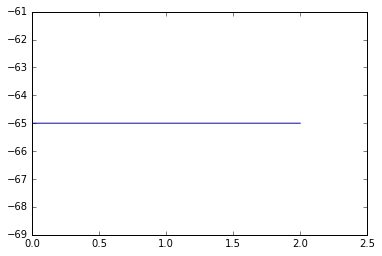

array(-65.0) * mV

In [6]:
# Initialize the tests and get their expected values
tests = helpers.setupTests(i_rest, i_passive, i_ap, i_thresh, expectedSource = "Pooled")

helpers.runOneTest(tests[0], mod1)

----------
Running Test: Resting potential test
Expected: -57.4345864662 mV +/- 24.630188347 mV SD
Actual: -65.0 mV, Z: -0.307160198178 SDs


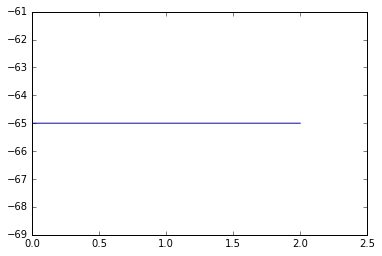

----------
Running Test: Input resistance test
Expected: 145113133.641 ohm +/- 189410293.868 ohm SD
Actual: 93089321.9836 kg*m**2/(s**3*A**2), Z: -0.274662008039 SDs


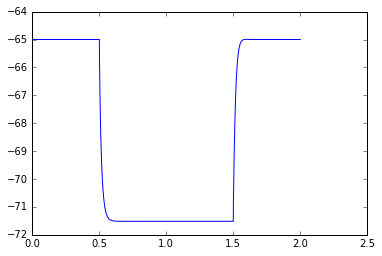

----------
Running Test: Time constant test
Expected: 27.9651006711 ms +/- 66.3591805191 ms SD
Actual: 21.8211772408 ms, Z: -0.0925858846094 SDs


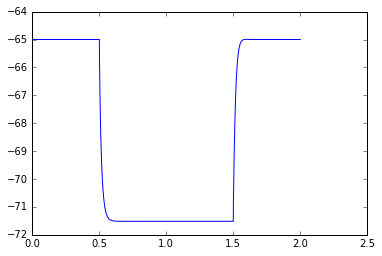

----------
Running Test: Injected current AP width test
Expected: 1.513125 ms +/- 0.961592715477 ms SD
Actual: 0.725 ms, Z: -0.819603754599 SDs


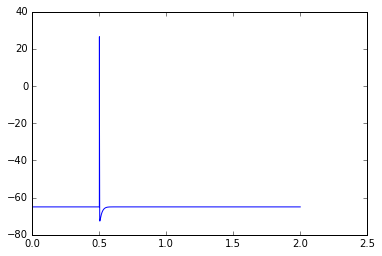

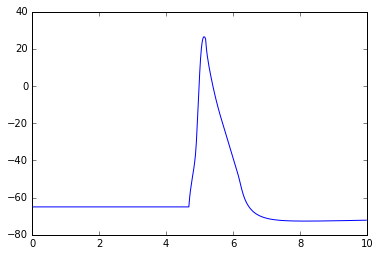

----------
Running Test: Injected current AP threshold test
Expected: -34.6053571429 mV +/- 56.7790487536 mV SD
Actual: -51.527420196 mV, Z: -0.298033577959 SDs


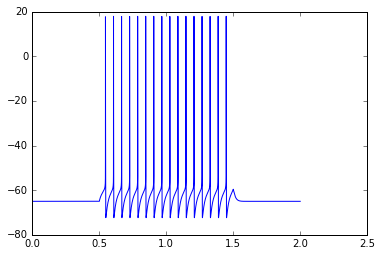

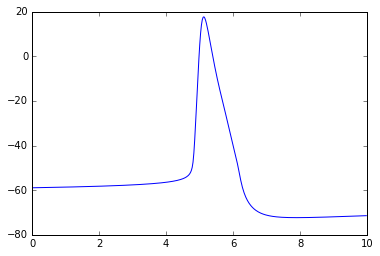

----------
Running Test: Injected current AP amplitude test
Expected: 68.776 mV +/- 50.4271404587 mV SD
Actual: 69.3836366729 mV, Z: 0.0120497943633 SDs


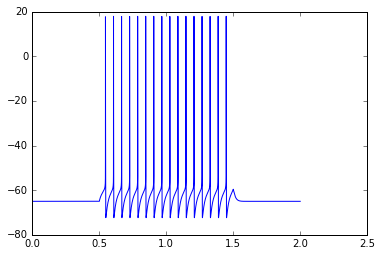

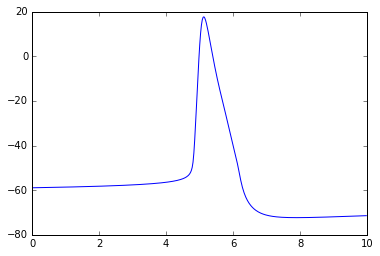

In [7]:
results = helpers.runAllTests(tests, mod1)

In [8]:
pp(results)
helpers.saveResults(results)
pp(helpers.loadResults())
mod1.h.quit()

{'Chen2002': {'Injected current AP amplitude test': array(69.38363667285836) * mV,
              'Injected current AP threshold test': array(-51.52742019600102) * mV,
              'Injected current AP width test': array(0.7250000000000001) * ms,
              'Input resistance test': array(93089321.98357664) * kg*m**2/(s**3*A**2),
              'Resting potential test': array(-65.0) * mV,
              'Time constant test': array(21.821177240828398) * ms}}
{'Chen2002': {'Injected current AP amplitude test': array(69.38363667285836) * mV,
              'Injected current AP threshold test': array(-51.52742019600102) * mV,
              'Injected current AP width test': array(0.7250000000000001) * ms,
              'Input resistance test': array(93089321.98357664) * kg*m**2/(s**3*A**2),
              'Resting potential test': array(-65.0) * mV,
              'Time constant test': array(21.821177240828398) * ms},
 'Davison2003': {'Injected current AP amplitude test': array(68.100442304070